In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import api_key

In [14]:
requests.__version__

'2.24.0'

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [16]:
url='http://api.openweathermap.org/data/2.5/weather?'

#query_url= f"{url}appid-{api_key}&q-{city}"
#'http://api.openweathermap.org/data/2.5/weather?appid=9b635016f26fe7d453837e6f8e824388&q=Bujumbura'
url= f'{url}appid={api_key}'


print(url)
# Get weather data

weather_response = requests.get(url)
weather_json = weather_response.json()

http://api.openweathermap.org/data/2.5/weather?appid=1b2f4a86c82e1e4c0288e4e9e19162ac


In [17]:
# Create an empty list to hold the weather data.
city_data=[]
# Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters.
record_count=1
set_count=1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1

# Run and API request for each of the cities.
    try:
        # Parse the JSON and retieve data.
        city_weather=requests.get(city_url).json()
        # Parse out the needed data.
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"]
        city_clouds=city_weather["clouds"]["all"]
        city_wind=city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City":city.title(), "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_wind, "Country": city_country, "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate the Data Loading is complete.
print("--------------------------")
print("Data Retrieval Complete   ")
print("--------------------------")
        

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | jishu
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | muros
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | vao
Processing Record 13 of Set 1 | carinhanha
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | oktyabrskiy
Processing Record 17 of Set 1 | bairiki
Processing Record 18 of Set 1 | samarai
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | adre
Processing Record 21 of Set 1 | ayan
Processing Record 22 of Set 1 | atuona
Processing Record 23 of Set 1 

Processing Record 41 of Set 4 | te anau
Processing Record 42 of Set 4 | saint-augustin
Processing Record 43 of Set 4 | aksarka
Processing Record 44 of Set 4 | lasa
Processing Record 45 of Set 4 | nicoya
Processing Record 46 of Set 4 | sovetskiy
Processing Record 47 of Set 4 | sioux lookout
Processing Record 48 of Set 4 | albufeira
Processing Record 49 of Set 4 | ponta delgada
Processing Record 50 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 1 of Set 5 | fuxin
Processing Record 2 of Set 5 | castro
Processing Record 3 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 5 | mlonggo
Processing Record 5 of Set 5 | korla
Processing Record 6 of Set 5 | sonqor
Processing Record 7 of Set 5 | sabha
Processing Record 8 of Set 5 | kodiak
Processing Record 9 of Set 5 | saleaula
City not found. Skipping...
Processing Record 10 of Set 5 | dikson
Processing Record 11 of Set 5 | abha
Processing Record 12 of Set 5 | santa cruz de la palma
Processing Re

Processing Record 26 of Set 8 | tukrah
Processing Record 27 of Set 8 | manavalakurichi
Processing Record 28 of Set 8 | lumphat
Processing Record 29 of Set 8 | george town
Processing Record 30 of Set 8 | takoradi
Processing Record 31 of Set 8 | tubruq
City not found. Skipping...
Processing Record 32 of Set 8 | belmonte
Processing Record 33 of Set 8 | sompeta
Processing Record 34 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 35 of Set 8 | tank
Processing Record 36 of Set 8 | umm lajj
Processing Record 37 of Set 8 | broome
Processing Record 38 of Set 8 | redmond
Processing Record 39 of Set 8 | vredendal
Processing Record 40 of Set 8 | kloulklubed
Processing Record 41 of Set 8 | impfondo
Processing Record 42 of Set 8 | high level
Processing Record 43 of Set 8 | galdar
Processing Record 44 of Set 8 | nguiu
City not found. Skipping...
Processing Record 45 of Set 8 | nauta
Processing Record 46 of Set 8 | kendari
Processing Record 47 of Set 8 | srednekolymsk
Processing 

Processing Record 13 of Set 12 | sturgeon bay
Processing Record 14 of Set 12 | keningau
Processing Record 15 of Set 12 | tibacuy
Processing Record 16 of Set 12 | ribeira brava
Processing Record 17 of Set 12 | northam
Processing Record 18 of Set 12 | warqla
City not found. Skipping...
Processing Record 19 of Set 12 | pionerskiy
Processing Record 20 of Set 12 | lashio
Processing Record 21 of Set 12 | guilin
Processing Record 22 of Set 12 | veraval
Processing Record 23 of Set 12 | bonavista
Processing Record 24 of Set 12 | agsu
City not found. Skipping...
Processing Record 25 of Set 12 | strelka
Processing Record 26 of Set 12 | vila franca do campo
Processing Record 27 of Set 12 | shitanjing
Processing Record 28 of Set 12 | beloha
Processing Record 29 of Set 12 | delmas
Processing Record 30 of Set 12 | satun
Processing Record 31 of Set 12 | umm durman
City not found. Skipping...
Processing Record 32 of Set 12 | bengkalis
City not found. Skipping...
Processing Record 33 of Set 12 | nedryha

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,297.48,72,71,5.34,CV,2021-12-05 21:14:14
1,Jishu,44.3167,126.8000,272.86,93,100,4.62,CN,2021-12-05 21:14:15
2,Avarua,-21.2078,-159.7750,300.18,89,40,2.57,CK,2021-12-05 21:14:15
3,Bambous Virieux,-20.3428,57.7575,298.83,78,40,3.60,MU,2021-12-05 21:14:15
4,Muros,42.7762,-9.0603,285.50,91,56,3.32,ES,2021-12-05 21:14:15
5,Rio Grande,-32.0350,-52.0986,296.21,73,22,5.99,BR,2021-12-05 21:14:16
6,Arraial Do Cabo,-22.9661,-42.0278,298.07,83,0,9.77,BR,2021-12-05 21:14:16
7,Mahebourg,-20.4081,57.7000,298.85,78,40,3.60,MU,2021-12-05 21:14:17
8,Pevek,69.7008,170.3133,250.83,97,100,5.58,RU,2021-12-05 21:14:17
9,Punta Arenas,-53.1500,-70.9167,286.21,44,40,12.35,CL,2021-12-05 21:09:27


In [20]:
#Reorder new columns

new_column_order = ['City', 'Country', 'Date' , 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness' , 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2021-12-05 21:14:14,14.8961,-24.4956,297.48,72,71,5.34
1,Jishu,CN,2021-12-05 21:14:15,44.3167,126.8000,272.86,93,100,4.62
2,Avarua,CK,2021-12-05 21:14:15,-21.2078,-159.7750,300.18,89,40,2.57
3,Bambous Virieux,MU,2021-12-05 21:14:15,-20.3428,57.7575,298.83,78,40,3.60
4,Muros,ES,2021-12-05 21:14:15,42.7762,-9.0603,285.50,91,56,3.32
...,...,...,...,...,...,...,...,...,...
574,Tungor,RU,2021-12-05 21:16:43,53.3808,142.9564,260.69,90,80,3.55
575,La Rioja,ES,2021-12-05 21:16:43,42.2500,-2.5000,275.64,98,100,3.21
576,Finnsnes,NO,2021-12-05 21:16:44,69.2296,17.9811,265.13,87,9,1.82
577,Azul,AR,2021-12-05 21:16:44,-36.7770,-59.8585,294.03,59,82,2.79


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1638739758.26524

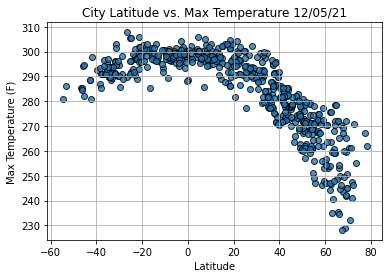

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

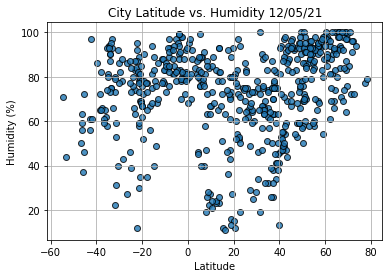

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

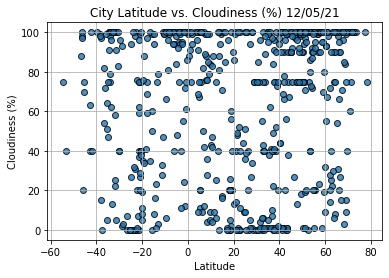

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

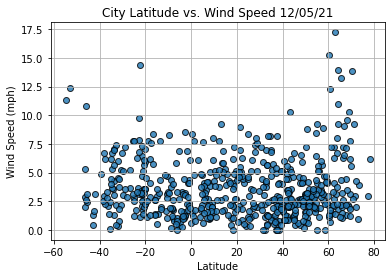

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()